# Part 1: Volumetric Understanding of the Data

Loading appropriate libraries

In [1]:
import pandas as pd 
import re

import matplotlib.pyplot as plt

Reading in the Data

In [2]:
# Read in data 
data = pd.read_csv('./Data/all_data.csv')

# Understand output of data
data.head(2)

,Unnamed: 0,created_at,text,hashtags,user_mention_ids,user_mention_screen_names,retweet_count,favorite_count,in_reply_to_user_id,in_reply_to_screen_name,...,user_id,user_screen_name,user_name,user_location,user_friends_count,user_followers_count,user_favourites_count,user_verfied,user_statuses_count,topic_y
0,0,2022-10-18 00:00:00,Sharp words on guns in Shane Hazel to Stacey A...,['gagovdebate'],[],[],5,24,NaN,NaN,...,25282846,SimonesNews,Simone Sebastian,Washington DC,3110,5830,1445,True,4400,abrams
1,1,2022-10-18 00:00:01,Stacey Abrams won tonight. She kept to the fac...,[],[],[],0,6,NaN,NaN,...,1312393604439183361,nching0,Thee Lost Edges of Candace 🪥,"34.2073° N, 84.1402° W",922,752,101529,False,61963,abrams


Basic Text Cleaning

In [3]:
# regex statement for cleaning 
replace = [
    (r"(?<=\d),(?=\d)", ""),        # Remove commas in numbers
    (r"\d+", "number"),             # Map digits to special token <numbr>
    (r"[\t\n\r\*\.\@\,\-\/]", " "), # Punctuation and other junk
    (r"\s+", " ")                   # Stips extra whitespace
]

# looping through all Tweets and applying regex cleaning 
train_sentences = []
for i, d in enumerate(data['text']):
    for repl in replace:
        d = re.sub(repl[0], repl[1], d)
    train_sentences.append(d)

# writing output of regex cleaning to df column 
data['cleaned_text'] = train_sentences

## EDA

In [4]:
print("There are {} Tweets in our dataset".format(len(data)))

There are 51336 Tweets in our dataset


Understanding distribution of data by search term topic - i.e. keywords used in Twitter query search 

In [5]:
# grouping by search term topic (combo of kemp, abrams, or election)
topic_counts = data.groupby('topic_y').count() \
                    .reset_index() \
                    .rename(columns = {'topic_y': 'topic', 'Unnamed: 0': 'counts'})

topic_counts = topic_counts[['topic', 'counts']]

# getting proportions of data represented by each search topic 
topic_counts['proportion'] = topic_counts['counts'] / sum(topic_counts['counts'])

topic_counts.head()

,topic,counts,proportion
0,abrams,32299,0.629169
1,"abrams, election",576,0.011220
2,"abrams, kemp",2228,0.043400
3,"abrams, kemp, election",780,0.015194
4,election,3726,0.072581


Looking at these results visually

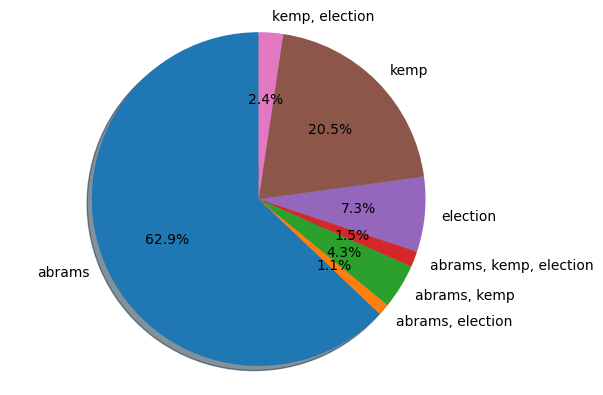

In [6]:
fig1, ax1 = plt.subplots()
ax1.pie(topic_counts['proportion'], labels = topic_counts['topic'], autopct='%1.1f%%',
        shadow=True, startangle=90)
ax1.axis('equal') 

plt.show()

basic EDA

- distribution of data 
- amount of tweets 

keyword associations to determine tweet mentions 

- keywords associated with each candidate 
- bin tweet into "mentions" category such that each tweet mentions 
    - candidate 1
    - candidate 2 
    - both candidates 
    - the election in general 

time series analysis 

- mentions of each candidate over time
(rate of increase or decrease of mentions over time) 

- overall which candidate is being talked about the most 

In [7]:
data

,Unnamed: 0,created_at,text,hashtags,user_mention_ids,user_mention_screen_names,retweet_count,favorite_count,in_reply_to_user_id,in_reply_to_screen_name,...,user_screen_name,user_name,user_location,user_friends_count,user_followers_count,user_favourites_count,user_verfied,user_statuses_count,topic_y,cleaned_text
0,0,2022-10-18 00:00:00,Sharp words on guns in Shane Hazel to Stacey A...,['gagovdebate'],[],[],5,24,NaN,NaN,...,SimonesNews,Simone Sebastian,Washington DC,3110,5830,1445,True,4400,abrams,Sharp words on guns in Shane Hazel to Stacey A...
1,1,2022-10-18 00:00:01,Stacey Abrams won tonight. She kept to the fac...,[],[],[],0,6,NaN,NaN,...,nching0,Thee Lost Edges of Candace 🪥,"34.2073° N, 84.1402° W",922,752,101529,False,61963,abrams,Stacey Abrams won tonight She kept to the fact...
2,2,2022-10-18 00:00:01,"Why did Joe Rogan send his little brother, Sha...",['GAGovDebate'],[],[],0,5,NaN,NaN,...,JTaylorSkinner,Jenn Taylor-Skinner (she/her),Seattle,17762,25727,82402,False,43808,abrams,Why did Joe Rogan send his little brother Shan...
3,3,2022-10-18 00:00:08,Viral handbag designer and EBONY Power100 Styl...,"['StaceyAbrams', 'BrandonBlackwood', 'EBONYMag']",[],[],1,8,NaN,NaN,...,EBONYMag,EBONY MAGAZINE,NaN,2334,445954,4403,True,91289,abrams,Viral handbag designer and EBONY Powernumber S...
4,4,2022-10-18 00:00:11,THE MOST DANGEROUS THING FACING GEORGIA IS 4 M...,[],[],[],212,528,NaN,NaN,...,MentallyDivine,Brian Baez,"Atlanta, GA",1990,9076,42697,False,9657,kemp,THE MOST DANGEROUS THING FACING GEORGIA IS num...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
51331,56904,2022-11-08 23:59:46,Stacey Abrams said abortion/ economy ho hand i...,[],[3223426134],['SethAbramson'],0,3,3.223426e+09,SethAbramson,...,DHolubiak,D Daggett Holubiak,"New Jersey, USA",609,397,72503,False,66171,abrams,Stacey Abrams said abortion economy ho hand in...
51332,56905,2022-11-08 23:59:54,"Republican, Gov Brian Kemp is only 59, but loo...",[],"[3150198231, 1001285146392383489]","['easterdayadel', 'blaireerskine']",3,24,3.150198e+09,easterdayadel,...,huffandpuff,pauline davis,NaN,737,938,99238,False,103479,kemp,Republican Gov Brian Kemp is only number but l...
51333,56906,2022-11-08 23:59:57,Is Stacey Abrams my governor yet??,[],[],[],2,64,NaN,NaN,...,kss_phd,beyoncé of neuro 👑🧠🐝,"Atlanta, GA",993,9431,78858,False,15980,abrams,Is Stacey Abrams my governor yet??
51334,56907,2022-11-08 23:59:57,I see your Katie Hobbs and raise you one Brian...,[],[2353605901],['GOPChairwoman'],0,6,2.353606e+09,GOPChairwoman,...,KodiforTexas,KODI for TEXAS,NaN,2030,279,2026,True,1076,kemp,I see your Katie Hobbs and raise you one Brian...


/var/folders/n2/bwdv1zhn55ngx2l75t_7jwkw0000gn/T/ipykernel_88346/3402400711.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  election_ts_df['day'] = pd.to_datetime(election_ts_df['created_at']).dt.floor('d')


<AxesSubplot:xlabel='day'>

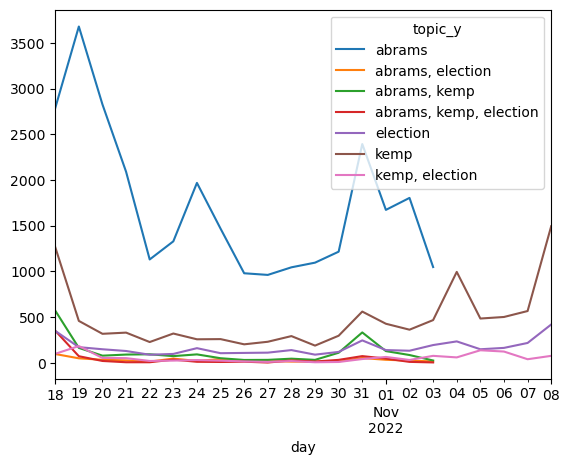

In [19]:
election_ts_df = data[['created_at', 'topic_y']]

election_ts_df['day'] = pd.to_datetime(election_ts_df['created_at']).dt.floor('d')
grouped_df = election_ts_df.groupby(['day', 'topic_y'], as_index=False).size()
pd.DataFrame(grouped_df.pivot(index="day", columns="topic_y", values="size")).plot()

/var/folders/n2/bwdv1zhn55ngx2l75t_7jwkw0000gn/T/ipykernel_88346/2004086519.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  election_ts_df['topic'] = election_ts_df['topic_y'].str.split(',')


<AxesSubplot:xlabel='day'>

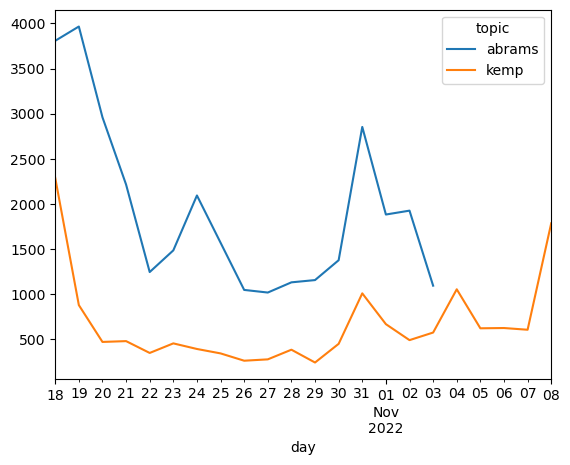

In [28]:
election_ts_df['topic'] = election_ts_df['topic_y'].str.split(',')
exploded_election_ts_df = election_ts_df.explode('topic')
exploded_election_ts_df['topic'] = exploded_election_ts_df['topic'].str.strip()
exploded_election_ts_df = exploded_election_ts_df[exploded_election_ts_df['topic'] != 'election']
exploded_grouped_df = exploded_election_ts_df.groupby(['day', 'topic'], as_index=False).size()
pd.DataFrame(exploded_grouped_df.pivot(index="day", columns="topic", values="size")).plot()

In [30]:
exploded_election_ts_df.groupby('topic').size()

topic
abrams    35883
kemp      14735
dtype: int64

<AxesSubplot:xlabel='day'>

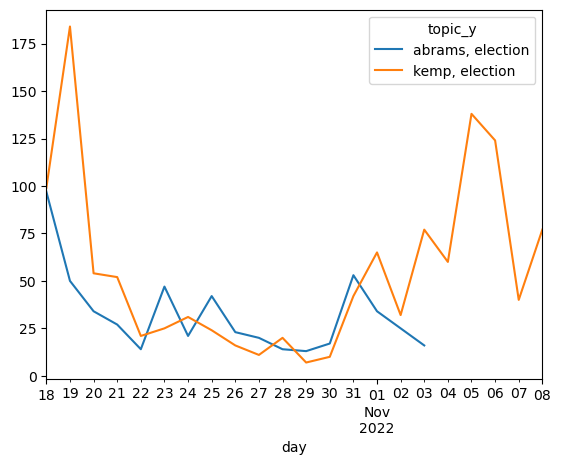

In [31]:
election_candidate_df = election_ts_df[election_ts_df['topic_y'].isin(['kemp, election', 'abrams, election'])]
election_candidate_df = election_candidate_df.groupby(['day', 'topic_y'], as_index=False).size()
pd.DataFrame(election_candidate_df.pivot(index="day", columns="topic_y", values="size")).plot()